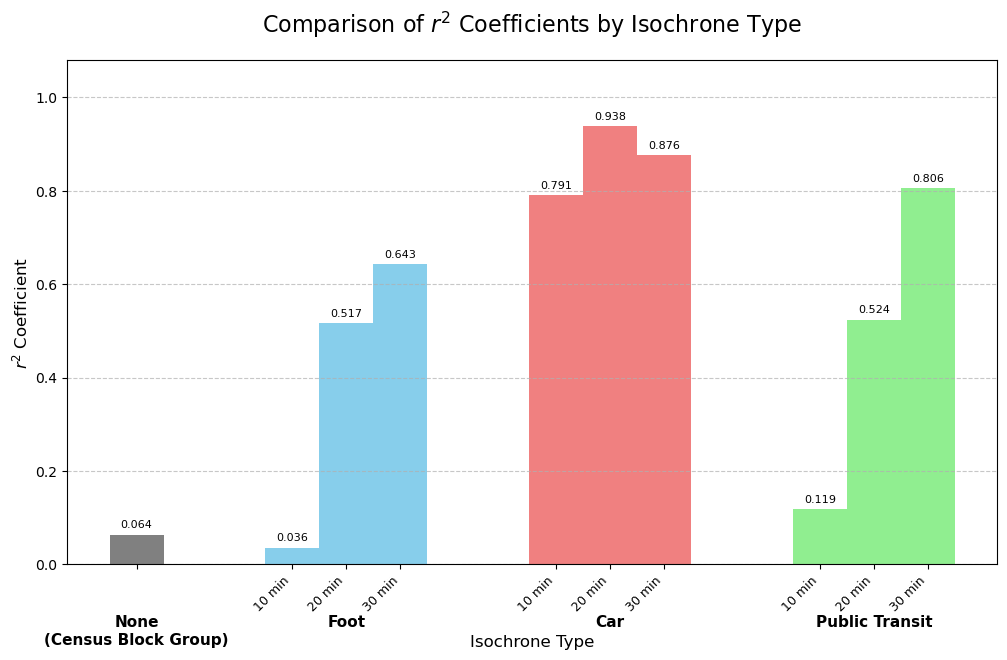

In [8]:
import matplotlib.pyplot as plt
import numpy as np

isochrone_types_orig = [
    "None (Census Block Group)",
    "10-minute foot isochrone",
    "20-minute foot isochrone",
    "30-minute foot isochrone",
    "10-minute car isochrone",
    "20-minute car isochrone",
    "30-minute car isochrone",
    "10-minute public transit isochrone",
    "20-minute public transit isochrone",
    "30-minute public transit isochrone"
]
r2_coefficients_orig = [0.064, 0.036, 0.517, 0.643, 0.791, 0.938, 0.876, 0.119, 0.524, 0.806]

plot_data = {
    "None (Census Block Group)": {
        "sub_labels": [""],
        "values": [0.064],
        "color": "grey",
        "main_label": "None\n(Census Block Group)" 
    },
    "Foot": {
        "sub_labels": ["10 min", "20 min", "30 min"],
        "values": [0.036, 0.517, 0.643],
        "color": "skyblue",
        "main_label": "Foot"
    },
    "Car": {
        "sub_labels": ["10 min", "20 min", "30 min"],
        "values": [0.791, 0.938, 0.876],
        "color": "lightcoral",
        "main_label": "Car"
    },
    "Public Transit": {
        "sub_labels": ["10 min", "20 min", "30 min"],
        "values": [0.119, 0.524, 0.806],
        "color": "lightgreen",
        "main_label": "Public Transit"
    }
}
group_order = ["None (Census Block Group)", "Foot", "Car", "Public Transit"] 

fig, ax = plt.subplots(figsize=(12, 8)) 

all_bar_objects = []
tick_positions = []
tick_labels = []
group_label_positions = []
current_pos = 0
bar_width = 0.8  
group_spacing = 1.5 

for i, group_name in enumerate(group_order):
    data = plot_data[group_name]
    num_bars_in_group = len(data["values"])
    group_bar_positions = []

    for j in range(num_bars_in_group):
        bar_x_pos = current_pos + j * bar_width
        bar = ax.bar(bar_x_pos, data["values"][j], width=bar_width, color=data["color"], label=f"{group_name} - {data['sub_labels'][j]}" if i == 0 and j == 0 else None) 
        all_bar_objects.append(bar[0]) 
        tick_positions.append(bar_x_pos)
        tick_labels.append(data["sub_labels"][j])
        group_bar_positions.append(bar_x_pos)
    
    if group_bar_positions:
        group_center = np.mean(group_bar_positions)
        group_label_positions.append((group_center, data["main_label"]))

    current_pos += num_bars_in_group * bar_width + group_spacing

ax.set_ylabel(r"$r^2$ Coefficient", fontsize=12)
ax.set_title(r"Comparison of $r^2$ Coefficients by Isochrone Type", fontsize=16, pad=20)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha="right", fontsize=9)
ax.set_xlabel("Isochrone Type", fontsize=12, labelpad=15) 
ax.grid(axis='y', linestyle='--', alpha=0.7)

all_values = [val for group in plot_data.values() for val in group['values']]
ax.set_ylim(0, max(all_values) * 1.15) 

for bar_obj in all_bar_objects:
    yval = bar_obj.get_height()
    ax.text(bar_obj.get_x() + bar_obj.get_width()/2.0,
             yval + 0.01,
             f'{yval:.3f}',
             ha='center', va='bottom', fontsize=8)

plt.subplots_adjust(bottom=0.25) 

min_y, max_y = ax.get_ylim()


y_offset_for_group_labels = -0.1 * max_y 

for pos, label_text in group_label_positions:
    ax.text(pos, y_offset_for_group_labels, label_text,
            ha='center', va='top', fontsize=11, fontweight='bold', color='black')

plt.show()